## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing data

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

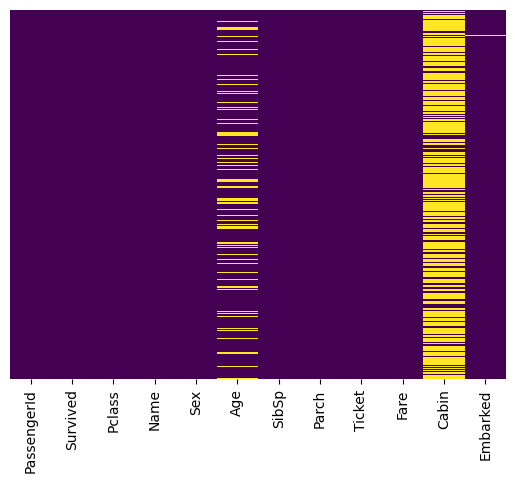

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

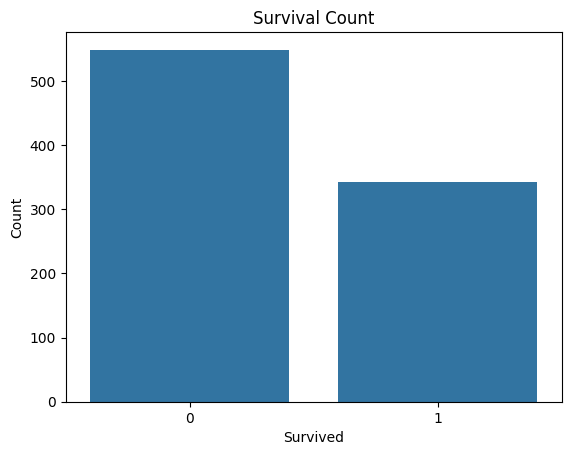

In [7]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

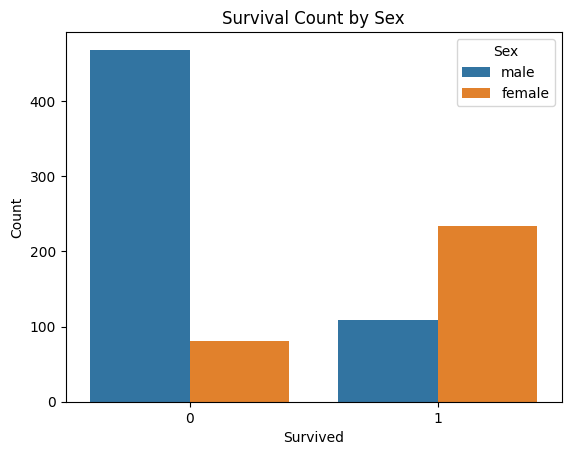

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex') 
plt.show()

* Most of male's are not survived 
* Most of female are survived

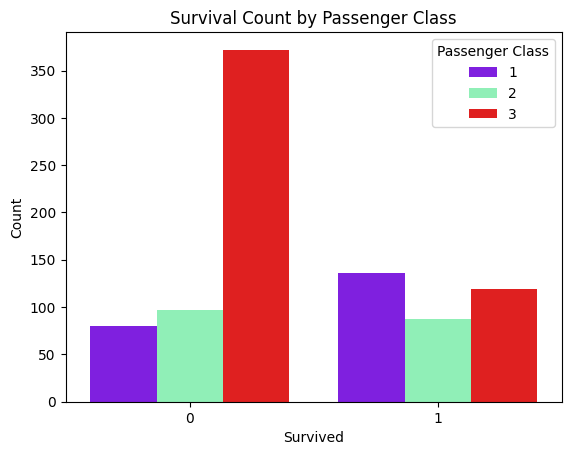

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()

* Passenger class 3 persons had died most than passenger class 1 and 2
* Passenger class 1 had most survived 

* Drop NAN values of "Age" column from dataset

C:\Users\3KT\AppData\Local\Temp\ipykernel_14024\738438287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=False, bins=40)


<Axes: xlabel='Age'>

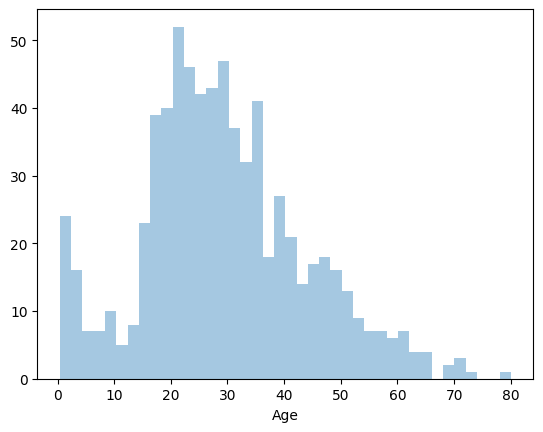

In [10]:
sns.distplot(df['Age'].dropna(), kde=False, bins=40)

* Count of people within the ranges of age 
* Apprx. 0-2 - more than 20 persons
* Approx. 17-30 - maximum range of peoples

<Axes: xlabel='SibSp', ylabel='count'>

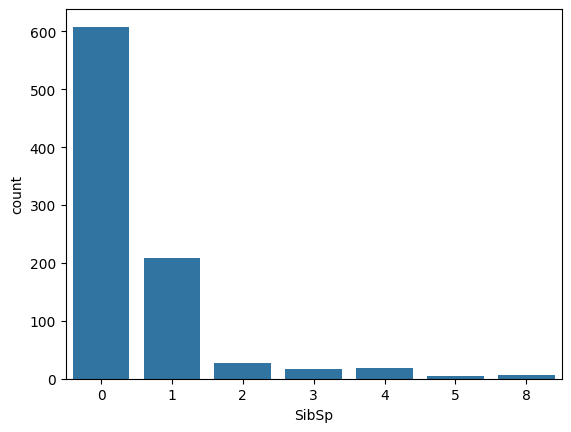

In [11]:
sns.countplot(x='SibSp', data=df)

* Maximum peoples dont have siblings or spauses

## Data Cleaning

C:\Users\3KT\AppData\Local\Temp\ipykernel_14024\825966384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

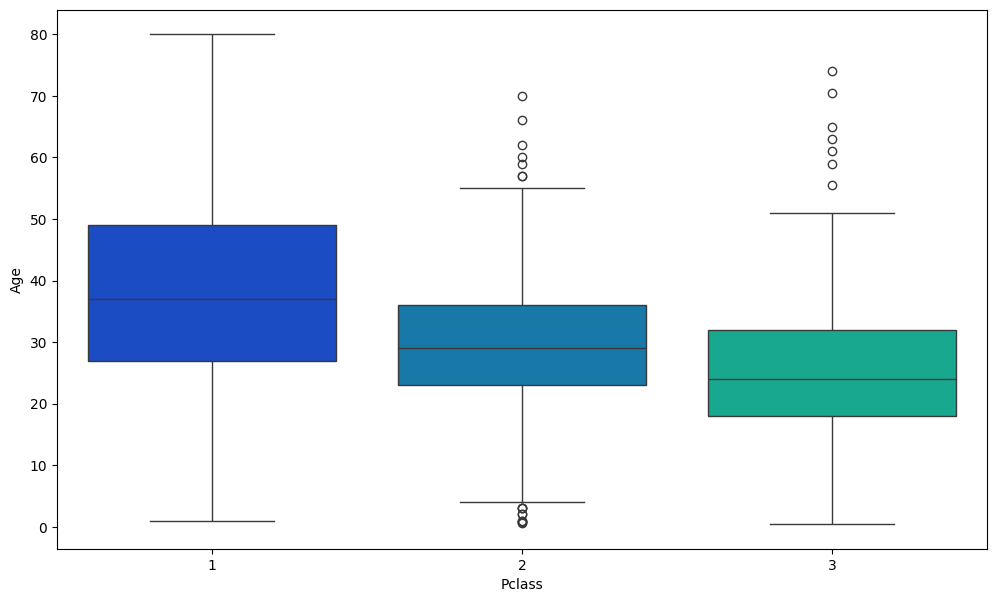

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

* 
We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [13]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37 # Average age of passenger class 1

        elif Pclass == 2:
            return 29 # Average age of passenger class 2

        else:
            return 24 # Average age of passenger class 3

    else:
        return Age

In [14]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\3KT\AppData\Local\Temp\ipykernel_14024\1707808779.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\3KT\AppData\Local\Temp\ipykernel_14024\1707808779.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

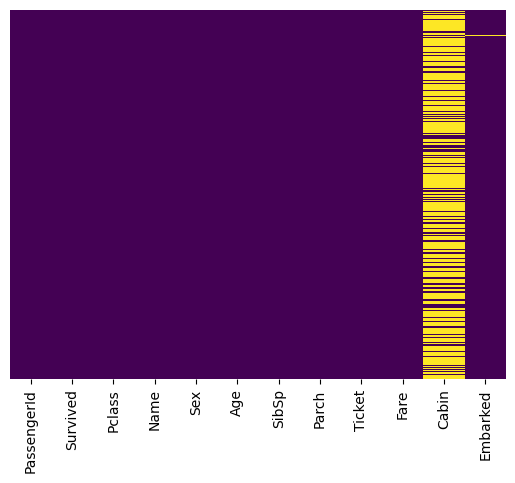

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

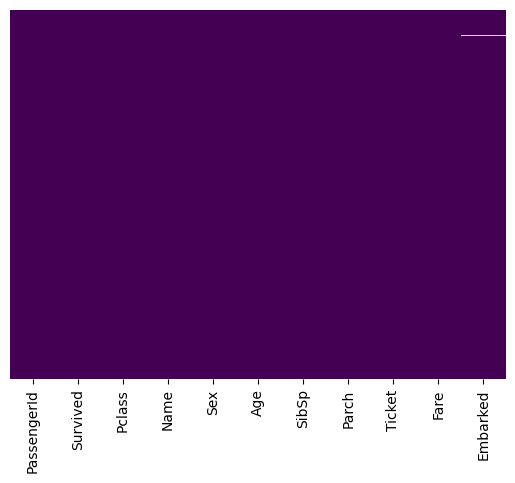

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df.dropna(inplace=True)  # Remove extra NAN values

## Converting Categorical Features

* We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [21]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [22]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
df =  pd.concat([df,sex,embark],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,24.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


#### Dependent feature -> survived
#### Independent feature -> all other columns

#### Now this dataset is ready  